# Rahwa's Notebook

In [359]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')

import us

In [360]:
csv_path = "../resources/raw/PopulationAndEducation/Education.csv"
education_df = pd.read_csv(csv_path)
rural_codes = education_df[['State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code']]
education_df = education_df.drop(['2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code'], axis=1)
#df.drop(['B', 'C'], axis=1)
education_df = education_df.dropna()
education_df.columns

Index(['FIPS Code', 'State', 'Area name',
       'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Less than a high school diploma, 1990',


In [361]:
csv_path = "../resources/raw/PopulationAndEducation/census2019.csv"
census2020_df = pd.read_csv(csv_path, sep=',' , encoding='latin-1')
census2019_df = census2020_df[["STATE","COUNTY","STNAME","CTYNAME","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016","POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019"]]
census2019_df

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,1,0,Alabama,Alabama,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,1,1,Alabama,Autauga County,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,1,3,Alabama,Baldwin County,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,1,5,Alabama,Barbour County,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,1,7,Alabama,Bibb County,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56,37,Wyoming,Sweetwater County,43574,43986,45002,45157,44948,44719,44222,43464,42858,42343
3189,56,39,Wyoming,Teton County,21296,21414,21624,22315,22773,23047,23234,23384,23269,23464
3190,56,41,Wyoming,Uinta County,21089,20896,20996,20951,20822,20763,20682,20431,20292,20226
3191,56,43,Wyoming,Washakie County,8530,8449,8409,8413,8273,8278,8165,8010,7877,7805


In [362]:
csv_path = "../resources/raw/PopulationAndEducation/census_2010.csv"
census2010_df = pd.read_csv(csv_path, sep=',' , encoding='latin-1')
census2010_df = census2010_df.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2000','CENSUS2010POP','POPESTIMATE2010'])
census2010_df

,STATE,COUNTY,STNAME,CTYNAME,POPESTIMATE2000,POPESTIMATE2001,POPESTIMATE2002,POPESTIMATE2003,POPESTIMATE2004,POPESTIMATE2005,POPESTIMATE2006,POPESTIMATE2007,POPESTIMATE2008,POPESTIMATE2009
0,1,0,Alabama,Alabama,4452173,4467634,4480089,4503491,4530729,4569805,4628981,4672840,4718206,4757938
1,1,1,Alabama,Autauga County,44021,44889,45909,46800,48366,49676,51328,52405,53277,54135
2,1,3,Alabama,Baldwin County,141342,144875,147957,151509,156266,162183,168121,172404,175827,179406
3,1,5,Alabama,Barbour County,29015,28863,28653,28594,28287,28027,27861,27757,27808,27657
4,1,7,Alabama,Bibb County,19913,21028,21199,21399,21721,22042,22099,22438,22705,22941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,Wyoming,Sweetwater County,37552,36899,37428,37450,38026,38739,39749,41470,42358,44133
3190,56,39,Wyoming,Teton County,18381,18653,18837,19066,19467,19632,20014,20472,20988,21232
3191,56,41,Wyoming,Uinta County,19666,19413,19587,19480,19470,19494,19709,20171,20613,21054
3192,56,43,Wyoming,Washakie County,8252,8068,7988,7976,7960,8022,7979,8169,8229,8423


In [363]:
csv_path = "../resources/raw/PopulationAndEducation/cencounts1990.csv"
census1990_df = pd.read_csv(csv_path)
census1990_df.dropna(inplace = True) 
tempcity = census1990_df["name"].str.split(" ", n = 1, expand = True)
census1990_df["STNAME"]= tempcity[0]
census1990_df["CTYNAME"]= tempcity[1]

for index, row in census1990_df.iterrows():
    state = us.states.lookup(row["STNAME"])
    census1990_df.loc[index, "STNAME"] = str(state)
    
census1990_df

,pop1900,pop1910,pop1920,pop1930,pop1940,pop1950,pop1960,pop1970,pop1980,pop1990,fips,name,STNAME,CTYNAME
0,76212168,92228496,106021537,123202624,132164569,151325798,179323175,203211926,226545805,248709873,0.0,US United States,None,United States
1,1828697,2138093,2348174,2646248,2832961,3061743,3266740,3444165,3893888,4040587,1000.0,AL Alabama,Alabama,Alabama
2,17915,20038,18908,19694,20977,18186,18739,24460,32259,34222,1001.0,AL Autauga County,Alabama,Autauga County
3,13194,18178,20730,28289,32324,40997,49088,59382,78556,98280,1003.0,AL Baldwin County,Alabama,Baldwin County
4,35152,32728,32067,32425,32722,28892,24700,22543,24756,25417,1005.0,AL Barbour County,Alabama,Barbour County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,.,.,.,2003,2543,2593,3062,4823,9355,11172,56039.0,WY Teton County,Wyoming,Teton County
3219,12223,16982,6611,6572,7223,7331,7484,7100,13021,18705,56041.0,WY Uinta County,Wyoming,Uinta County
3220,.,.,3106,4109,5858,7252,8883,7569,9496,8388,56043.0,WY Washakie County,Wyoming,Washakie County
3221,3203,4960,4631,4673,4958,6733,7929,6307,7106,6518,56045.0,WY Weston County,Wyoming,Weston County


In [364]:
overallcensus_df = pd.merge(census1990_df, census2010_df, on=['STNAME','CTYNAME'])
overallcensus_df = pd.merge(overallcensus_df, census2019_df, on=['STNAME','CTYNAME'])
#overallcensus_df[["STNAME","CTYNAME","pop1900","pop1910","pop1920","pop1930","pop1940","pop1950","pop1960","pop1970","pop1980","pop1990","POPESTIMATE2000","POPESTIMATE2001","POPESTIMATE2002","POPESTIMATE2003","POPESTIMATE2004","POPESTIMATE2005","POPESTIMATE2006","POPESTIMATE2007","POPESTIMATE2008","POPESTIMATE2009","POPESTIMATE2010","POPESTIMATE2011","POPESTIMATE2012","POPESTIMATE2013","POPESTIMATE2014","POPESTIMATE2015","POPESTIMATE2016","POPESTIMATE2017","POPESTIMATE2018","POPESTIMATE2019"]]
overallcensus_df = overallcensus_df[['STNAME',
       'CTYNAME','pop1900', 'pop1910', 'pop1920', 'pop1930', 'pop1940', 'pop1950',
       'pop1960', 'pop1970', 'pop1980', 'pop1990', 'fips', 'name',  'STATE_x', 'COUNTY_x', 'POPESTIMATE2000', 'POPESTIMATE2001',
       'POPESTIMATE2002', 'POPESTIMATE2003', 'POPESTIMATE2004',
       'POPESTIMATE2005', 'POPESTIMATE2006', 'POPESTIMATE2007',
       'POPESTIMATE2008', 'POPESTIMATE2009', 'STATE_y', 'COUNTY_y',
       'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012',
       'POPESTIMATE2013', 'POPESTIMATE2014', 'POPESTIMATE2015',
       'POPESTIMATE2016', 'POPESTIMATE2017', 'POPESTIMATE2018',
       'POPESTIMATE2019']]
csv_path= "../resources/clean/overall_population.csv"
overallcensus_df.to_csv (csv_path, index = False, header=True)
overallcensus_df

,STNAME,CTYNAME,pop1900,pop1910,pop1920,pop1930,pop1940,pop1950,pop1960,pop1970,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,Alabama,1828697,2138093,2348174,2646248,2832961,3061743,3266740,3444165,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alabama,Autauga County,17915,20038,18908,19694,20977,18186,18739,24460,...,54773,55227,54954,54727,54893,54864,55243,55390,55533,55869
2,Alabama,Baldwin County,13194,18178,20730,28289,32324,40997,49088,59382,...,183112,186558,190145,194885,199183,202939,207601,212521,217855,223234
3,Alabama,Barbour County,35152,32728,32067,32425,32722,28892,24700,22543,...,27327,27341,27169,26937,26755,26283,25806,25157,24872,24686
4,Alabama,Bibb County,18498,22791,23144,20780,20155,17987,14357,13812,...,22870,22745,22667,22521,22553,22566,22586,22550,22367,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,Wyoming,Sweetwater County,8455,11575,13640,18165,19407,22017,17920,18391,...,43574,43986,45002,45157,44948,44719,44222,43464,42858,42343
3167,Wyoming,Teton County,.,.,.,2003,2543,2593,3062,4823,...,21296,21414,21624,22315,22773,23047,23234,23384,23269,23464
3168,Wyoming,Uinta County,12223,16982,6611,6572,7223,7331,7484,7100,...,21089,20896,20996,20951,20822,20763,20682,20431,20292,20226
3169,Wyoming,Washakie County,.,.,3106,4109,5858,7252,8883,7569,...,8530,8449,8409,8413,8273,8278,8165,8010,7877,7805


In [365]:
census_state = overallcensus_df.loc[(overallcensus_df["STNAME"] == overallcensus_df["CTYNAME"])]
census_state = census_state.drop_duplicates(subset=['STNAME'])
census_state.reset_index(drop=True, inplace=True)
census_state['pop1900'] = census_state['pop1900'].astype(int)
census_state['pop1910'] = census_state['pop1910'].astype(int)
census_state['pop1920'] = census_state['pop1920'].astype(int)
census_state['pop1930'] = census_state['pop1930'].astype(int)
census_state['pop1940'] = census_state['pop1940'].astype(int)
census_state['pop1950'] = census_state['pop1950'].astype(int)
census_state['pop1960'] = census_state['pop1960'].astype(int)
census_state['pop1970'] = census_state['pop1970'].astype(int)
census_state['pop1980'] = census_state['pop1980'].astype(int)
census_state['pop1990'] = census_state['pop1990'].astype(int)
csv_path= "../resources/clean/state_population.csv"
census_state.to_csv (csv_path, index = False, header=True)
census_state


,STNAME,CTYNAME,pop1900,pop1910,pop1920,pop1930,pop1940,pop1950,pop1960,pop1970,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,Alabama,Alabama,1828697,2138093,2348174,2646248,2832961,3061743,3266740,3444165,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,Alaska,Alaska,63592,64356,55036,59278,72524,128643,226167,300382,...,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545
2,Arizona,Arizona,122931,204354,334162,435573,499261,749587,1302161,1770900,...,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717
3,Arkansas,Arkansas,1311564,1574449,1752204,1854482,1949387,1909511,1786272,1923295,...,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804
4,California,California,1485053,2377549,3426861,5677251,6907387,10586223,15717204,19953134,...,37319502,37638369,37948800,38260787,38596972,38918045,39167117,39358497,39461588,39512223
5,Colorado,Colorado,539700,799024,939629,1035791,1123296,1325089,1753947,2207259,...,5047349,5121108,5192647,5269035,5350101,5450623,5539215,5611885,5691287,5758736
6,Connecticut,Connecticut,908420,1114756,1380631,1606903,1709242,2007280,2535234,3031709,...,3579114,3588283,3594547,3594841,3594524,3587122,3578141,3573297,3571520,3565287
7,Delaware,Delaware,184735,202322,223003,238380,266505,318085,446292,548104,...,899593,907381,915179,923576,932487,941252,948921,956823,965479,973764
8,District of Columbia,District of Columbia,278718,331069,437571,486869,663091,802178,763956,756510,...,605226,619800,634924,650581,662328,675400,685815,694906,701547,705749
9,Florida,Florida,528542,752619,968470,1468211,1897414,2771305,4951560,6789443,...,18845537,19053237,19297822,19545621,19845911,20209042,20613477,20963613,21244317,21477737


In [366]:
USA_df = census_state.sum(axis=0)
USA_df = USA_df.drop(['STNAME','CTYNAME','fips','name','STATE_x','COUNTY_x','STATE_y','COUNTY_y'])
df = pd.DataFrame(USA_df,  
                 columns =['Year']) 
USA_df

pop1900             76212168
pop1910             92228496
pop1920            106021537
pop1930            123202624
pop1940            132164569
pop1950            151325798
pop1960            179323175
pop1970            203211926
pop1980            226545805
pop1990            248709873
POPESTIMATE2000    282162411
POPESTIMATE2001    284968955
POPESTIMATE2002    287625193
POPESTIMATE2003    290107933
POPESTIMATE2004    292805298
POPESTIMATE2005    295516599
POPESTIMATE2006    298379912
POPESTIMATE2007    301231207
POPESTIMATE2008    304093966
POPESTIMATE2009    306771529
POPESTIMATE2010    309321666
POPESTIMATE2011    311556874
POPESTIMATE2012    313830990
POPESTIMATE2013    315993715
POPESTIMATE2014    318301008
POPESTIMATE2015    320635163
POPESTIMATE2016    322941311
POPESTIMATE2017    324985539
POPESTIMATE2018    326687501
POPESTIMATE2019    328239523
dtype: object

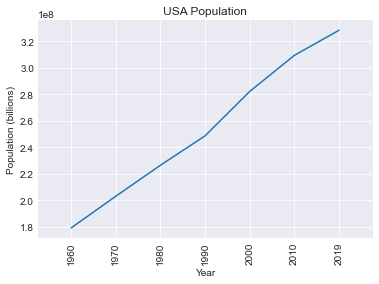

In [367]:
x_axis = np.arange(0, 7)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("USA Population")
plt.xlabel("Year")
plt.ylabel("Population (billions)")

plt.xlim(-0.75, 7 -.25)

x_label = ['1960','1970','1980','1990','2000','2010','2019']
plt.plot(x_axis, USA_df[['pop1960', 'pop1970', 'pop1980', 'pop1990', 'POPESTIMATE2000',
       'POPESTIMATE2010', 
       'POPESTIMATE2019']])
plt.xticks(tick_locations, x_label, rotation='vertical')


plt.savefig("../RahwaGraphs/OverallPopulation.png")
plt.show()

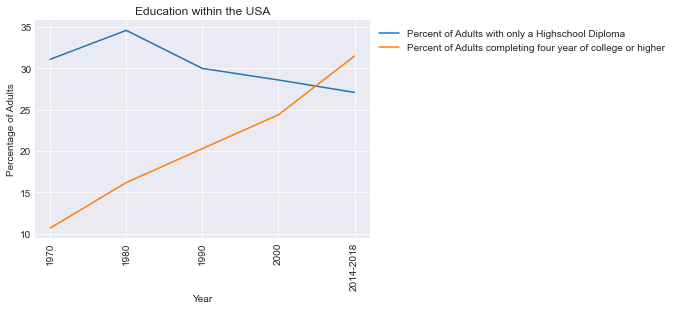

In [368]:
college = education_df[['State','Area name','Percent of adults completing four years of college or higher, 1970',"Percent of adults completing four years of college or higher, 1980","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with a bachelor's degree or higher, 2014-18"]]
college_US = college.loc[college["State"] == "US"]

college_US = college_US.drop(["State","Area name"], axis=1)
college_US = college_US.transpose()

highschool = education_df[['State','Area name','Percent of adults with a high school diploma only, 1970', 'Percent of adults with a high school diploma only, 1980', 'Percent of adults with a high school diploma only, 1990', 'Percent of adults with a high school diploma only, 2000', 'Percent of adults with a high school diploma only, 2014-18']]
highschool_US= highschool.loc[highschool["State"]== "US"]

highschool_US = highschool_US.drop(["State","Area name"], axis=1)
highschool_US = highschool_US.transpose()
highschool_US

x_axis = np.arange(0, 5)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Education within the USA")
plt.xlabel("Year")
plt.ylabel("Percentage of Adults")

x_label = ['1970','1980','1990','2000','2014-2018']
plt.plot(x_axis, highschool_US[0], label="Percent of Adults with only a Highschool Diploma")
plt.plot(x_axis, college_US[0], label="Percent of Adults completing four year of college or higher")
plt.xticks(tick_locations, x_label, rotation='vertical')
plt.legend(bbox_to_anchor=(1, 1))

plt.savefig("../RahwaGraphs/OverallEducation.png")
plt.show()

In [369]:
for index, row in education_df.iterrows():
    state = us.states.lookup(row["State"])
    education_df.loc[index, "State"] = str(state)

education_df
csv_path = "../resources/clean/Karen_clean.csv"
city_names = pd.read_csv(csv_path)
city_names = city_names.groupby(["sub_region_2"]).first()
city_names = city_names.reset_index()
city_names = city_names[["sub_region_2","country_region_code","country_region","sub_region_1"]]
city_names = city_names.rename(columns={"sub_region_2":"Area name", "sub_region_2":"Area name"})
city_names["Area name"] = city_names["Area name"].astype(str)
city_names

for index, row in city_names.iterrows():
    state = us.states.lookup(row["sub_region_1"])
    city_names.loc[index, "State"] = str(state)
education_df

,FIPS Code,State,Area name,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2014-18","High school diploma only, 2014-18","Some college or associate's degree, 2014-18","Bachelor's degree or higher, 2014-18","Percent of adults with less than a high school diploma, 2014-18","Percent of adults with a high school diploma only, 2014-18","Percent of adults completing some college or associate's degree, 2014-18","Percent of adults with a bachelor's degree or higher, 2014-18"
0,0,None,United States,"52,373,312","34,158,051","11,650,730","11,717,266",47.7,31.1,10.6,...,27.4,24.4,"26,948,057","59,265,308","63,365,655","68,867,051",12.3,27.1,29.0,31.5
1,1000,Alabama,Alabama,"1,062,306","468,269","136,287","141,936",58.7,25.9,7.5,...,25.9,19.0,"470,043","1,020,172","987,148","822,595",14.2,30.9,29.9,24.9
2,1001,Alabama,Autauga County,"6,611","3,757",933,767,54.8,31.1,7.7,...,26.9,18.0,"4,204","12,119","10,552","10,291",11.3,32.6,28.4,27.7
3,1003,Alabama,Baldwin County,"18,726","8,426","2,334","2,038",59.4,26.7,7.4,...,29.3,23.1,"14,310","40,579","46,025","46,075",9.7,27.6,31.3,31.3
4,1005,Alabama,Barbour County,"8,120","2,242",581,861,68.8,19.0,4.9,...,21.3,10.9,"4,901","6,486","4,566","2,220",27.0,35.7,25.1,12.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,56037,Wyoming,Sweetwater County,"4,393","3,731",986,960,43.6,37.1,9.8,...,35.7,17.0,"2,549","9,433","10,108","6,243",9.0,33.3,35.7,22.0
3200,56039,Wyoming,Teton County,708,908,524,455,27.3,35.0,20.2,...,30.0,45.8,958,"2,272","4,087","9,847",5.6,13.2,23.8,57.4
3201,56041,Wyoming,Uinta County,"1,569","1,517",445,352,40.4,39.1,11.5,...,34.2,15.0,934,"5,176","4,810","1,995",7.2,40.1,37.2,15.4
3202,56043,Wyoming,Washakie County,"1,572","1,437",590,432,39.0,35.6,14.6,...,33.1,18.7,590,"1,717","2,135","1,220",10.4,30.3,37.7,21.5


In [370]:
education_df["Change"]= education_df["Percent of adults with a bachelor's degree or higher, 2014-18"] - education_df["Percent of adults with a bachelor's degree or higher, 2000"]
education_df = education_df.drop_duplicates(subset=['State','Area name'])

state = education_df['State'].values
city = education_df['Area name'].values
education_df["Location"] = (city + ', ' + state ).astype(str)


lowest_five = education_df.sort_values(by=['Change']).head(5)
lowest_fivenames = lowest_five["Location"]
top_five = education_df.sort_values(by=['Change']).tail(5)
top_fivenames = top_five["Location"]

<ipython-input-370-c233aa586ee8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_df["Location"] = (city + ', ' + state ).astype(str)


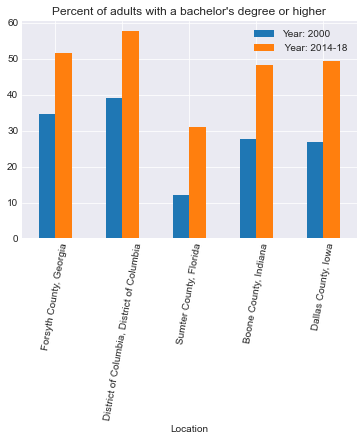

In [371]:
temp_df = top_five[["Location","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with a bachelor's degree or higher, 2014-18"]]                  
temp_df = temp_df.rename(columns={"Percent of adults with a bachelor's degree or higher, 2000":"Year: 2000", "Percent of adults with a bachelor's degree or higher, 2014-18":" Year: 2014-18"})
temp_df = temp_df.set_index('Location')   
temp_df.plot.bar(title = "Percent of adults with a bachelor's degree or higher",rot=80)  
plt.savefig("../RahwaGraphs/TopFiveEducation.png")
    


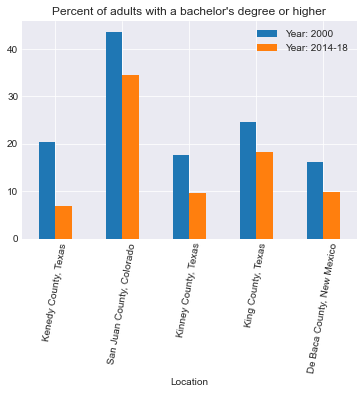

In [372]:
temp_df = lowest_five[["Location","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with a bachelor's degree or higher, 2014-18"]]                  
temp_df = temp_df.set_index('Location')   
temp_df = temp_df.rename(columns={"Percent of adults with a bachelor's degree or higher, 2000":"Year: 2000", "Percent of adults with a bachelor's degree or higher, 2014-18":"Year: 2014-18"})  
temp_df.plot.bar(title = "Percent of adults with a bachelor's degree or higher",rot=80) 
plt.savefig("../RahwaGraphs/LowFiveEducation.png")

In [348]:
birth_df = census2020_df[["STNAME","CTYNAME","RBIRTH2011","RBIRTH2012","RBIRTH2013","RBIRTH2014","RBIRTH2015","RBIRTH2016","RBIRTH2017","RBIRTH2018","RBIRTH2019"]]

state = birth_df['STNAME'].values
city = birth_df['CTYNAME'].values
birth_df["Location"] = (city + ', ' + state ).astype(str)

lowest_ed_birth_df = pd.merge(lowest_fivenames, birth_df, on='Location', how='left', sort=False)
lowest_ed_birth_df = lowest_ed_birth_df.set_index("Location")
lowest_ed_birth_df = lowest_ed_birth_df.transpose()
lowest_ed_birth_df = lowest_ed_birth_df.drop(['STNAME','CTYNAME']) 
lowest_ed_birth_df

<ipython-input-348-d59038348bbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birth_df["Location"] = (city + ', ' + state ).astype(str)


Location,"Kenedy County, Texas","San Juan County, Colorado","Kinney County, Texas","King County, Texas","De Baca County, New Mexico"
RBIRTH2011,11.6959,11.4449,8.05891,14.652,10.9154
RBIRTH2012,2.25989,4.34153,9.6605,11.3636,9.60323
RBIRTH2013,20.339,1.44509,9.07716,7.36648,4.6332
RBIRTH2014,9.14286,9.97151,8.07125,3.73134,5.80628
RBIRTH2015,6.83371,8.56531,10.6398,7.33945,10.1768
RBIRTH2016,2.2805,8.69565,10.7958,10.453,8.62999
RBIRTH2017,16.2225,7.12758,8.43882,0,6.04396
RBIRTH2018,0,5.42005,11.3468,14.1593,7.25446
RBIRTH2019,14.2687,5.36193,10.0557,14.5985,7.3717


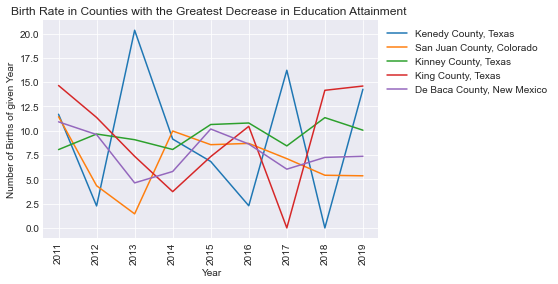

In [373]:
x_axis = np.arange(0, 9)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Birth Rate in Counties with the Greatest Decrease in Education Attainment ")
plt.xlabel("Year")
plt.ylabel("Number of Births of given Year")

x_label = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
plt.plot(x_axis, lowest_ed_birth_df["Kenedy County, Texas"], label="Kenedy County, Texas")
plt.plot(x_axis, lowest_ed_birth_df["San Juan County, Colorado"], label="San Juan County, Colorado")
plt.plot(x_axis, lowest_ed_birth_df["Kinney County, Texas"], label="Kinney County, Texas")
plt.plot(x_axis, lowest_ed_birth_df["King County, Texas"], label="King County, Texas")
plt.plot(x_axis, lowest_ed_birth_df["De Baca County, New Mexico"], label="De Baca County, New Mexico")



plt.xticks(tick_locations, x_label, rotation='vertical')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("../RahwaGraphs/LowestEducationBirthRate.png")
plt.show()

In [350]:
top_ed_birth_df = pd.merge(top_fivenames, birth_df, on='Location', how='left', sort=False)
top_ed_birth_df = top_ed_birth_df.drop_duplicates(subset=['Location'])
top_ed_birth_df = top_ed_birth_df.set_index("Location")
top_ed_birth_df = top_ed_birth_df.transpose()
top_ed_birth_df = top_ed_birth_df.drop(['STNAME','CTYNAME']) 
top_ed_birth_df

Location,"Forsyth County, Georgia","District of Columbia, District of Columbia","Sumter County, Florida","Boone County, Indiana","Dallas County, Iowa"
RBIRTH2011,12.4067,15.0136,4.5877,12.1396,14.7897
RBIRTH2012,11.8832,14.7156,4.37779,11.9711,15.8669
RBIRTH2013,11.0196,14.6946,4.36311,12.1797,16.5507
RBIRTH2014,11.6045,14.2188,4.27136,12.445,15.6004
RBIRTH2015,11.3568,14.4245,4.55275,12.3051,15.849
RBIRTH2016,11.1273,14.2784,4.01531,12.529,15.4052
RBIRTH2017,11.1121,14.0405,3.87038,12.208,15.5725
RBIRTH2018,10.4779,13.6388,3.55518,11.8505,13.8518
RBIRTH2019,10.1196,13.4911,3.66089,11.3376,14.1653


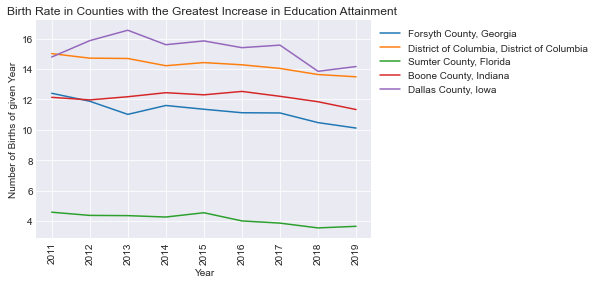

In [374]:
x_axis = np.arange(0, 9)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Birth Rate in Counties with the Greatest Increase in Education Attainment ")
plt.xlabel("Year")
plt.ylabel("Number of Births of given Year")

x_label = ['2011','2012','2013','2014','2015','2016','2017','2018','2019']
plt.plot(x_axis, top_ed_birth_df["Forsyth County, Georgia"], label="Forsyth County, Georgia")
plt.plot(x_axis, top_ed_birth_df["District of Columbia, District of Columbia"], label="District of Columbia, District of Columbia")
plt.plot(x_axis, top_ed_birth_df["Sumter County, Florida"], label="Sumter County, Florida")
plt.plot(x_axis, top_ed_birth_df["Boone County, Indiana"], label="Boone County, Indiana")
plt.plot(x_axis, top_ed_birth_df["Dallas County, Iowa"], label="Dallas County, Iowa")



plt.xticks(tick_locations, x_label, rotation='vertical')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig("../RahwaGraphs/HighestEducationBirthRate.png")
plt.show()